# What is next?
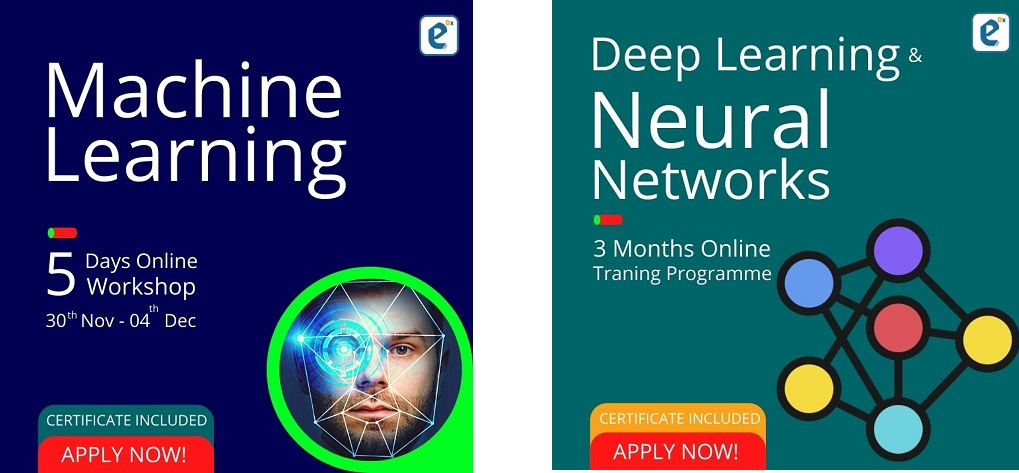

# Feedback /Recommendation 

1. [Facebook - Thakshila](https://www.facebook.com/tdasunAI/reviews)
2. [Facebook - edxcope](https://www.facebook.com/edxcope/reviews)
3. [Review on Course](https://www.edxcope.com/courses/machine-learning-5-days-workshop-in-sinhala/)

# Plan for Today

1. Introduction to Dimensionality Reduction Algorithms
2. Introduction to Principal Component Analysis
3. Introduction to Feature Engineering

# Introduction to Dimensionality Reduction Algorithms

Dimensionality reduction is an unsupervised learning technique.

Nevertheless, it can be used as a data transform pre-processing step for machine learning algorithms on classification and regression predictive modeling datasets with supervised learning algorithms.

Dimensionality reduction refers to techniques for reducing the number of input variables in training data.

```When dealing with high dimensional data, it is often useful to reduce the dimensionality by projecting the data to a lower dimensional subspace which captures the “essence” of the data```. This is called dimensionality reduction.

High-dimensionality might mean hundreds, thousands, or even millions of input variables.

Fewer input dimensions often means correspondingly fewer parameters or a simpler structure in the machine learning model, referred to as degrees of freedom. A model with too many degrees of freedom is likely to overfit the training dataset and may not perform well on new data.

It is desirable to have simple models that generalize well, and in turn, input data with few input variables. This is particularly true for linear models where the number of inputs and the degrees of freedom of the model are often closely related.

Dimensionality reduction is a data preparation technique performed on data prior to modeling. It might be performed after data cleaning and data scaling and before training a predictive model.

```Dimensionality reduction yields a more compact, more easily interpretable representation of the target concept, focusing the user’s attention on the most relevant variables.```


# Dimensionality Reduction Algorithms
There are many algorithms that can be used for dimensionality reduction.

Two main classes of methods are those drawn from linear algebra and those drawn from manifold learning.

## 1. Linear Algebra Methods
Matrix factorization methods drawn from the field of linear algebra can be used for dimensionality.

For more on matrix factorization, see the tutorial:

A Gentle Introduction to Matrix Factorization for Machine Learning
Some of the more popular methods include:

1. Principal Components Analysis
2. Singular Value Decomposition
3. Non-Negative Matrix Factorization


## 2. Manifold Learning Methods
Manifold learning methods seek a lower-dimensional projection of high dimensional input that captures the salient properties of the input data.

Some of the more popular methods include:

1. Isomap Embedding
2. Locally Linear Embedding
3. Multidimensional Scaling
4. Spectral Embedding
5. t-distributed Stochastic Neighbor Embedding

# Principal Component Analysis

Principal Component Analysis, or PCA, might be the most popular technique for dimensionality reduction with dense data (few zero values).
It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data

In [70]:
import numpy as np
import pandas as pd

dataset=pd.read_csv('xvsy.csv').values

print(dataset)

[[25.   6. ]
 [30.   6. ]
 [40.  10. ]
 [50.   9. ]
 [15.   6. ]
 [20.   7. ]
 [35.   8. ]
 [45.   7. ]
 [35.   6.5]
 [27.   7.5]
 [ 5.   4. ]
 [20.   4.5]
 [ 8.   5.5]
 [12.   3.5]
 [45.   9. ]
 [15.   3. ]]


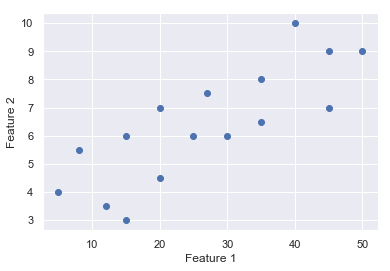

In [139]:
from matplotlib import pyplot as plt

plt.scatter(dataset[:,0],dataset[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [142]:
iris_dataset= pd.read_csv('iris.csv').values

pca = PCA(n_components=1)

pca.fit(iris_dataset[:,0:4])

print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]]


In [143]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

pca.fit(dataset)

print(pca.components_)

[[0.99307469 0.11748473]]


In [144]:
dataset_new=pca.transform(dataset)

In [145]:
print(dataset_new)

[[ -1.72354171]
 [  3.24183174]
 [ 13.64251755]
 [ 23.45577971]
 [-11.6542886 ]
 [ -6.57143043]
 [  8.44217464]
 [ 18.2554368 ]
 [  8.26594755]
 [  0.43883476]
 [-21.82000495]
 [ -6.86514225]
 [-18.66455379]
 [-14.92722449]
 [ 18.49040626]
 [-12.00674279]]


# How the Dimeansionality Reduction is done

In [149]:
print(dataset)
print(pca.components_)

[[25.   6. ]
 [30.   6. ]
 [40.  10. ]
 [50.   9. ]
 [15.   6. ]
 [20.   7. ]
 [35.   8. ]
 [45.   7. ]
 [35.   6.5]
 [27.   7.5]
 [ 5.   4. ]
 [20.   4.5]
 [ 8.   5.5]
 [12.   3.5]
 [45.   9. ]
 [15.   3. ]]
[[0.99307469 0.11748473]]


In [147]:
dataset_new_m=np.matmul(dataset,pca.components_.T)
print(dataset_new_m)

[[25.53177561]
 [30.49714905]
 [40.89783486]
 [50.71109703]
 [15.60102872]
 [20.68388689]
 [35.69749196]
 [45.51075412]
 [35.52126486]
 [27.69415208]
 [ 5.43531236]
 [20.39017507]
 [ 8.59076353]
 [12.32809282]
 [45.74572358]
 [15.24857453]]


In [150]:
print(np.mean(dataset_new_m))

27.255317317117004


In [146]:
pca.components_.T

array([[0.99307469],
       [0.11748473]])

In [78]:
dataset_new_m-np.mean(dataset_new_m)

array([[ -1.72354171],
       [  3.24183174],
       [ 13.64251755],
       [ 23.45577971],
       [-11.6542886 ],
       [ -6.57143043],
       [  8.44217464],
       [ 18.2554368 ],
       [  8.26594755],
       [  0.43883476],
       [-21.82000495],
       [ -6.86514225],
       [-18.66455379],
       [-14.92722449],
       [ 18.49040626],
       [-12.00674279]])

# PCA for visualization: Hand-written digits

In [151]:
from sklearn.datasets import load_digits
digits = load_digits()
images=digits.images
print(images.shape)

(1797, 8, 8)


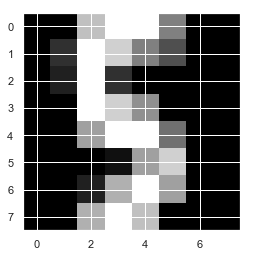

In [154]:
from matplotlib import pyplot as plt

plt.imshow(images[102],cmap='gray')

In [156]:
data=digits.data
print(data.shape)

(1797, 64)


In [159]:
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
new_data = pca.fit_transform(data)
print(data.shape)
print(new_data.shape)
print(new_data)

(1797, 64)
(1797, 2)
[[ -1.25946756  21.27488325]
 [  7.95760919 -20.76869996]
 [  6.99192544  -9.95598587]
 ...
 [ 10.80128413  -6.96025095]
 [ -4.8721013   12.4239495 ]
 [ -0.34438771   6.365551  ]]


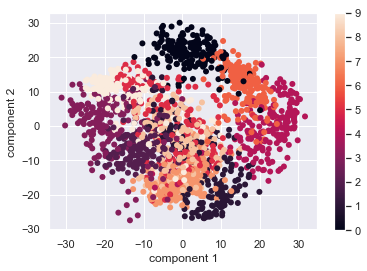

In [161]:
%matplotlib inline
plt.scatter(new_data[:, 0], new_data[:, 1],
            c=digits.target, edgecolor='none')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

# Choosing the number of components

Text(0, 0.5, 'cumulative explained variance')

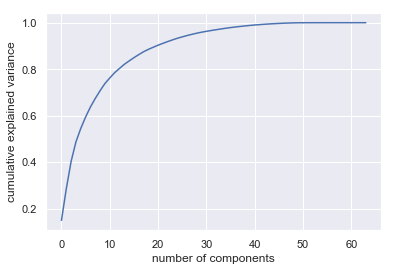

In [162]:
pca = PCA()
pca.fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# Feature Engineering

Feature Engineering is not there just to optimize models. Sometimes we need to apply these techniques so our data is compatible with the machine learning algorithm. Machine learning algorithms sometimes expect data formatted in a certain way, and that is where feature engineering can help us. Apart from that, it is important to note that data scientists and engineers spend most of their time on data preprocessing. That is why it is important to master these techniques. Here are some of the commonly used Feature Engineering Methods,

1. Imputation
2. Categorical Encoding
3. Handling Outliers
4. Polynomial Features
5. Binning
6. Scaling
7. Log Transform
8. Feature Selection
9. Feature Grouping
10. Feature Split

## 1. Imputation
Data that we get from clients can come in all shapes and forms. Often it is sparse, meaning some samples may miss data for some features. We need to detect those instances and remove those samples or replace empty values with something. Depending on the rest of the dataset, we may apply different strategies for replacing those missing values. For example, we may fill these empty slots with average feature value, or maximal feature value. 

In [34]:
import pandas as pd

data = pd.read_csv('cardio_dataset.csv') # reads and save the dataset in a Pandas Dataframe object
data

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,female,48.0,236.0,66,no smoking,taking,no,1.1
1,male,48.0,260.0,51,no smoking,taking,yes,7.0
2,male,44.0,187.0,49,smoking,taking,no,7.0
3,female,42.0,216.0,57,smoking,taking,no,0.4
4,female,56.0,156.0,42,no smoking,taking,no,2.2
5,male,NaN,162.0,57,smoking,taking,no,3.0
6,male,50.0,244.0,47,no smoking,taking,no,4.2
7,male,48.0,212.0,30,smoking,taking,no,17.4
8,female,66.0,202.0,53,no smoking,taking,yes,13.4
9,male,63.0,186.0,46,smoking,taking,no,17.3


In [35]:
print(data.isnull().sum())

SEX           5
AGEIR         5
TC            6
HDL           0
SMOKE_        3
BPMED         1
DIAB_noyes    0
RISK          0
dtype: int64


### Solution 1

This means that there are instances in our dataset that are missing values in some of the features. The easiest deal with missing values is to drop samples with missing values from the dataset

In [36]:
data = pd.read_csv('cardio_dataset.csv')
data = data.dropna()
data

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,female,48.0,236.0,66,no smoking,taking,no,1.1
1,male,48.0,260.0,51,no smoking,taking,yes,7.0
2,male,44.0,187.0,49,smoking,taking,no,7.0
3,female,42.0,216.0,57,smoking,taking,no,0.4
4,female,56.0,156.0,42,no smoking,taking,no,2.2
6,male,50.0,244.0,47,no smoking,taking,no,4.2
7,male,48.0,212.0,30,smoking,taking,no,17.4
8,female,66.0,202.0,53,no smoking,taking,yes,13.4
9,male,63.0,186.0,46,smoking,taking,no,17.3
11,male,58.0,234.0,36,smoking,taking,no,13.2


### Solution 2
Te other way is to use imputation, meaning to replace missing values. To do so we can pick some value, or use the mean value of the feature, or an average value of the feature, etc.

In [37]:
data = pd.read_csv('cardio_dataset.csv')
data = data.fillna(0)
data

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,female,48.0,236.0,66,no smoking,taking,no,1.1
1,male,48.0,260.0,51,no smoking,taking,yes,7.0
2,male,44.0,187.0,49,smoking,taking,no,7.0
3,female,42.0,216.0,57,smoking,taking,no,0.4
4,female,56.0,156.0,42,no smoking,taking,no,2.2
5,male,0.0,162.0,57,smoking,taking,no,3.0
6,male,50.0,244.0,47,no smoking,taking,no,4.2
7,male,48.0,212.0,30,smoking,taking,no,17.4
8,female,66.0,202.0,53,no smoking,taking,yes,13.4
9,male,63.0,186.0,46,smoking,taking,no,17.3


This is not good. So, here is the proper way. We detected missing data in numerical features. For the imputation value of these features, we will use the mean value of the feature or the most frequent value. 

In [38]:
data = pd.read_csv('cardio_dataset.csv')

data['AGEIR'].fillna((data['AGEIR'].mean()), inplace=True)
data['TC'].fillna((data['TC'].mean()), inplace=True)
data['HDL'].fillna((data['HDL'].mean()), inplace=True)

data['SEX'].fillna((data['SEX'].value_counts().index[0]), inplace=True)

data.reset_index()

,index,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,0,female,48.000000,236.000000,66,no smoking,taking,no,1.1
1,1,male,48.000000,260.000000,51,no smoking,taking,yes,7.0
2,2,male,44.000000,187.000000,49,smoking,taking,no,7.0
3,3,female,42.000000,216.000000,57,smoking,taking,no,0.4
4,4,female,56.000000,156.000000,42,no smoking,taking,no,2.2
5,5,male,56.648592,162.000000,57,smoking,taking,no,3.0
6,6,male,50.000000,244.000000,47,no smoking,taking,no,4.2
7,7,male,48.000000,212.000000,30,smoking,taking,no,17.4
8,8,female,66.000000,202.000000,53,no smoking,taking,yes,13.4
9,9,male,63.000000,186.000000,46,smoking,taking,no,17.3


Often, data is not missing, but it has an invalid value. For example, we know that for the ‘sex‘ feature we can have two values: FEMALE and MALE.

In [39]:
data.loc[(data['SEX'] != 'female') & (data['SEX'] != 'male')]

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
27,yes,56.648592,256.0,33,no smoking,taking,no,25.3


In [40]:
data = data.drop([27])
data.reset_index()

,index,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,0,female,48.000000,236.000000,66,no smoking,taking,no,1.1
1,1,male,48.000000,260.000000,51,no smoking,taking,yes,7.0
2,2,male,44.000000,187.000000,49,smoking,taking,no,7.0
3,3,female,42.000000,216.000000,57,smoking,taking,no,0.4
4,4,female,56.000000,156.000000,42,no smoking,taking,no,2.2
5,5,male,56.648592,162.000000,57,smoking,taking,no,3.0
6,6,male,50.000000,244.000000,47,no smoking,taking,no,4.2
7,7,male,48.000000,212.000000,30,smoking,taking,no,17.4
8,8,female,66.000000,202.000000,53,no smoking,taking,yes,13.4
9,9,male,63.000000,186.000000,46,smoking,taking,no,17.3


## 2. Categorical Encoding
One way to improve your predictions is by applying clever ways when working with categorical variables. These variables, as the name suggests, have discrete values and represent some sort of category or class. For example color can be categorical variable (‘red’, ‘blue‘, ‘green‘). The challenge is including these variables into data analysis and use them with machine learning algorithms. Some machine learning algorithms support categorical variables without further manipulation, but some don’t. That is why we use a categorical encoding.

#### Before categorical encoding,  categorical variables should be extracted from our dataset into a separate variable and mark them as categorical type:

In [41]:
data.dtypes

SEX            object
AGEIR         float64
TC            float64
HDL             int64
SMOKE_         object
BPMED          object
DIAB_noyes     object
RISK          float64
dtype: object

In [42]:
data["SEX"] = data["SEX"].astype('category')
data["SMOKE_"] = data["SMOKE_"].astype('category')
data["BPMED"] = data["BPMED"].astype('category')
data["DIAB_noyes"] = data["DIAB_noyes"].astype('category')
print(data.dtypes)

SEX           category
AGEIR          float64
TC             float64
HDL              int64
SMOKE_        category
BPMED         category
DIAB_noyes    category
RISK           float64
dtype: object


In [46]:
categorical_data = data.drop(['AGEIR', 'TC', 'HDL','RISK'], axis=1)
categorical_data.head()

,SEX,SMOKE_,BPMED,DIAB_noyes
0,female,no smoking,taking,no
1,male,no smoking,taking,yes
2,male,smoking,taking,no
3,female,smoking,taking,no
4,female,no smoking,taking,no


### 2.1 Label Encoding
Label encoding is converting each categorical value into some number.

In [47]:
categorical_data["SEX"] = categorical_data["SEX"].cat.codes
categorical_data["SMOKE_"] = categorical_data["SMOKE_"].cat.codes
categorical_data["BPMED"] = categorical_data["BPMED"].cat.codes
categorical_data["DIAB_noyes"] = categorical_data["DIAB_noyes"].cat.codes
categorical_data

,SEX,SMOKE_,BPMED,DIAB_noyes
0,0,0,1,0
1,1,0,1,1
2,1,1,1,0
3,0,1,1,0
4,0,0,1,0
5,1,1,1,0
6,1,0,1,0
7,1,1,1,0
8,0,0,1,1
9,1,1,1,0


In [48]:
numerical_data = data.drop(['SEX', 'SMOKE_', 'BPMED','DIAB_noyes'], axis=1)
numerical_data.head()

,AGEIR,TC,HDL,RISK
0,48.0,236.0,66,1.1
1,48.0,260.0,51,7.0
2,44.0,187.0,49,7.0
3,42.0,216.0,57,0.4
4,56.0,156.0,42,2.2


In [50]:
dataset_new=categorical_data.join(numerical_data)
dataset_new.head()

,SEX,SMOKE_,BPMED,DIAB_noyes,AGEIR,TC,HDL,RISK
0,0,0,1,0,48.0,236.0,66,1.1
1,1,0,1,1,48.0,260.0,51,7.0
2,1,1,1,0,44.0,187.0,49,7.0
3,0,1,1,0,42.0,216.0,57,0.4
4,0,0,1,0,56.0,156.0,42,2.2


### 2.2 One-Hot Encoding
This is one of the most popular categorical encoding techniques. It spreads the values in a feature to multiple flag features and assigns values 0 or 1 to them. This binary value represents the relationship between non-encoded and encoded features.
For example, in our dataset, we have two possible values in ‘sex‘ feature: FEMALE and MALE. This technique will create two separate features labeled let’s say ‘sex_female‘ and ‘sex_male‘. If in the ‘sex‘ feature we have value ‘FEMALE‘ for some sample, the ‘sex_female‘ will be assigned value 1 and ‘sex_male‘ will be assigned value 0. In the same way, if in the ‘sex‘ feature we have the value ‘MALE‘ for some sample, the ‘sex_male‘ will be assigned value 1 and ‘sex_female‘ will be assigned value 0. 

In [62]:
categorical_data = data.drop(['AGEIR', 'TC', 'HDL','RISK'], axis=1)

encoded_sex = pd.get_dummies(categorical_data['SEX'])
encoded_smoke = pd.get_dummies(categorical_data['SMOKE_'])
encoded_bpmed = pd.get_dummies(categorical_data['BPMED'])
encoded_diab = pd.get_dummies(categorical_data['DIAB_noyes'])

categorical_data = categorical_data.join(encoded_sex)
categorical_data = categorical_data.join(encoded_smoke)
categorical_data = categorical_data.join(encoded_bpmed)
categorical_data = categorical_data.join(encoded_diab)
categorical_data.head()

,SEX,SMOKE_,BPMED,DIAB_noyes,female,male,no smoking,smoking,not taking,taking,no,yes
0,female,no smoking,taking,no,1,0,1,0,0,1,1,0
1,male,no smoking,taking,yes,0,1,1,0,0,1,0,1
2,male,smoking,taking,no,0,1,0,1,0,1,1,0
3,female,smoking,taking,no,1,0,0,1,0,1,1,0
4,female,no smoking,taking,no,1,0,1,0,0,1,1,0


## Replacing

In [70]:
categorical_data = data.drop(['AGEIR', 'TC', 'HDL','RISK'], axis=1)

In [71]:
encoded_sex = pd.get_dummies(categorical_data['SEX'])
encoded_smoke = pd.get_dummies(categorical_data['SMOKE_'])
encoded_bpmed = pd.get_dummies(categorical_data['BPMED'])
encoded_diab = pd.get_dummies(categorical_data['DIAB_noyes'])

In [72]:
numerical_data = data.drop(['SEX', 'SMOKE_', 'BPMED','DIAB_noyes'], axis=1)
numerical_data.head()

,AGEIR,TC,HDL,RISK
0,48.0,236.0,66,1.1
1,48.0,260.0,51,7.0
2,44.0,187.0,49,7.0
3,42.0,216.0,57,0.4
4,56.0,156.0,42,2.2


In [73]:
new_dataset=numerical_data.join(encoded_sex)
new_dataset=new_dataset.join(encoded_smoke)
new_dataset=new_dataset.join(encoded_bpmed)
new_dataset=new_dataset.join(encoded_diab)
new_dataset.head()

,AGEIR,TC,HDL,RISK,female,male,no smoking,smoking,not taking,taking,no,yes
0,48.0,236.0,66,1.1,1,0,1,0,0,1,1,0
1,48.0,260.0,51,7.0,0,1,1,0,0,1,0,1
2,44.0,187.0,49,7.0,0,1,0,1,0,1,1,0
3,42.0,216.0,57,0.4,1,0,0,1,0,1,1,0
4,56.0,156.0,42,2.2,1,0,1,0,0,1,1,0


### 2.3 Target Encoding
Unlike previous techniques, this one is a little bit more complicated. It replaces a categorical value with the average value of the output (ie. target) for that value of the feature. Essentially, all you need to do is calculate the average output for all the rows with specific category value. Now, this is quite straight forward when the output value is numerical. If the output is categorical, like in our PalmerPenguins dataset, we need to apply some of the previous techniques to it.
Often this average value is blended with the outcome probability over the entire dataset in order to reduce the variance of values with few occurrences.  It is important to note that since category values are calculated based on the output value, these calculations should be done on the training dataset and then applied to other datasets. Otherwise, we would face information leakage, meaning that we would include information about the output values from the test set inside of the training set. This would render our tests invalid or give us false confidence. 

In [79]:
categorical_data = data.drop(['AGEIR', 'TC', 'HDL','RISK'], axis=1)

In [80]:
categorical_data["SEX"] = categorical_data["SEX"].cat.codes

island_means = categorical_data.groupby('SMOKE_')['SEX'].mean()
island_means

SMOKE_
no smoking    0.418363
smoking       0.612760
Name: SEX, dtype: float64

## 3. Handling Outliers
Outliers are values that are deviating from the whole distribution of the data. Sometimes these values are mistakes and wrong measurements and should be removed from datasets, but sometimes they are valuable edge-case information. This means that sometimes we want to leave these values in the dataset, since they may carry some important information, while other times we want to remove those samples, because of the wrong information.

In a nutshell, we can use the Inter-quartile range to detect these points. Inter-quartile range or IQR indicates where 50 percent of data is located. When we are looking for this value we first look for the median, since it splits data into half. Then we are locating the median of the lower end of the data (denoted as Q1) and the median of the higher end of the data (denoted as Q3). Data between Q1 and Q3 is the IQR. Outliers are defined as samples that fall below Q1 – 1.5(IQR) or above Q3 + 1.5(IQR). We can do this using a boxplot. The purpose of the boxplot is to visualize the distribution. In essence, it includes important points: max value, min value, median, and two IQR points (Q1, Q3). Here is how one example of a boxplot looks like:

What is a Quartile?

1. The first quartile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set. It is also known as the lower or 25th empirical quartile, as 25% of the data is below this point.
2. The second quartile (Q2) is the median of a data set; thus 50% of the data lies below this point.
3. The third quartile (Q3) is the middle value between the median and the highest value (maximum) of the data set. It is known as the upper or 75th empirical quartile, as 75% of the data lies below this point.


If a data set has no outliers (unusual values in the data set), a boxplot will be made up of the following values.

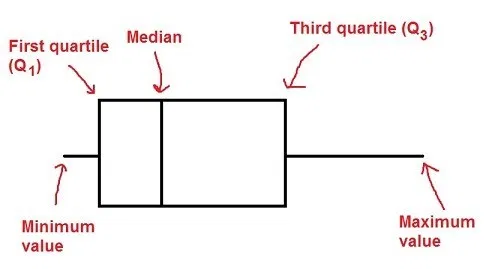

## Clear picture with the distribution

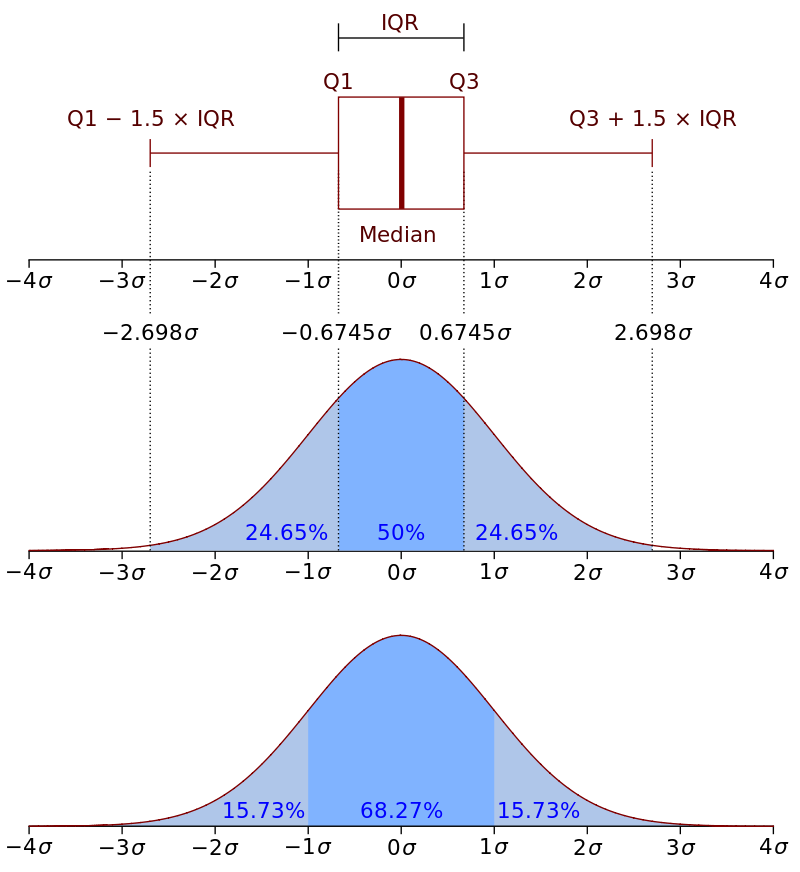

But, if there ARE outliers, then a boxplot will instead be made up of the following values.
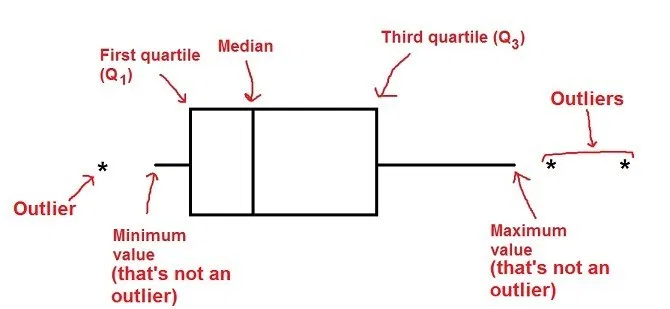
As you can see above, outliers (if there are any) will be shown by stars or points off the main plot. If there are no outliers, you simply won’t see those points.

<AxesSubplot:xlabel='SEX', ylabel='HDL'>

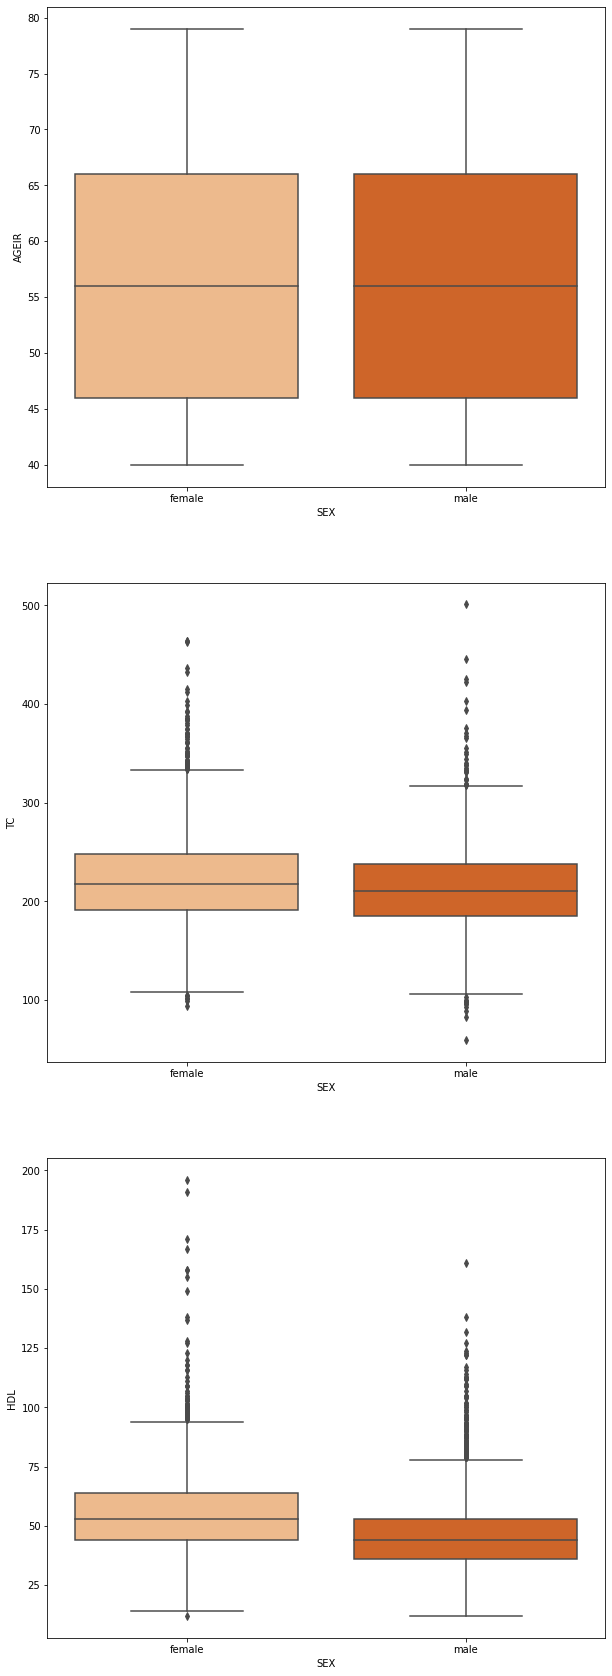

In [84]:
import seaborn as sb
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=3,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=data,y="AGEIR",x="SEX",orient="v",ax=axes[0], palette="Oranges")
sb.boxplot(data=data,y="TC",x="SEX",orient="v",ax=axes[1], palette="Oranges")
sb.boxplot(data=data,y="HDL",x="SEX",orient="v",ax=axes[2], palette="Oranges")

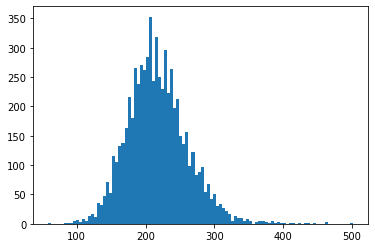

In [109]:
scaled_data = data[['TC']]
plt.hist(scaled_data,bins=100)
plt.show()

The other way for detecting and removing outliers would by using standard deviation.

In [110]:
factor = 4
upper_lim = data['TC'].mean () + data['TC'].std () * factor
lower_lim = data['TC'].mean () - data['TC'].std () * factor

no_outliers = data[(data['TC'] < upper_lim) & (data['TC'] > lower_lim)]
no_outliers.head()

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,female,48.0,236.0,66,no smoking,taking,no,1.1
1,male,48.0,260.0,51,no smoking,taking,yes,7.0
2,male,44.0,187.0,49,smoking,taking,no,7.0
3,female,42.0,216.0,57,smoking,taking,no,0.4
4,female,56.0,156.0,42,no smoking,taking,no,2.2


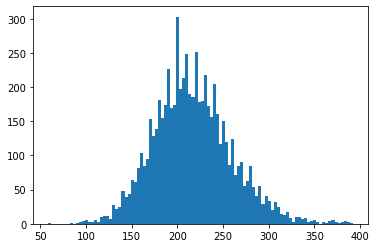

In [112]:
plt.hist(no_outliers['TC'],bins=100)
plt.show()

### Standard Devaition - The empirical rule
The standard deviation and the mean together can tell you where most of the values in your distribution lie if they follow a normal distribution.

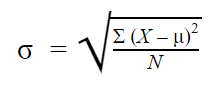

The empirical rule, or the 68-95-99.7 rule, tells you where your values lie:

1. Around 68% of scores are within 2 standard deviations of the mean,
2. Around 95% of scores are within 4 standard deviations of the mean,
3. Around 99.7% of scores are within 6 standard deviations of the mean.

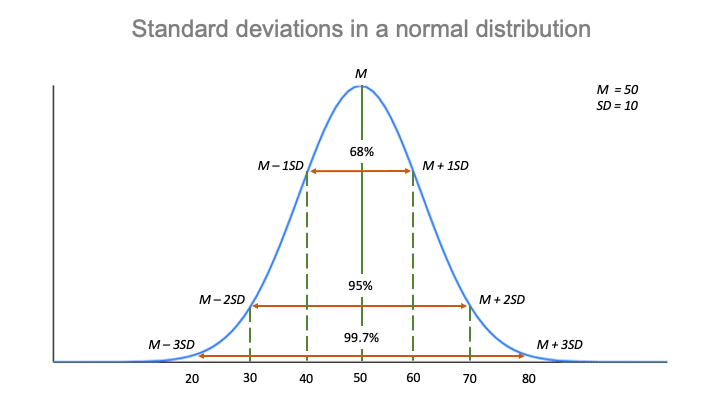

## 4. Scaling

Scaling is done for one simple reason, if features are not in the same range, they will be treated differently by the machine learning algorithm. To put it in lame terms, if we have one feature that has a range of values from 0-10 and another 0-100, a machine learning algorithm might deduce that the second feature is more important than the first one just because it has a higher value. As we already know that is not always the case. On the other hand, it is unrealistic to expect that real data comes in the same range. That is why we use scaling, to put our numerical features into the same range. This standardization of data is a common requirement for many machine learning algorithms. Some of them even require that features look like standard normally distributed data. There are several ways we can scale and standardize the data, but before we go through them, let’s observe one feature of PalmerPenguins dataset ‘body_mass_g‘. 

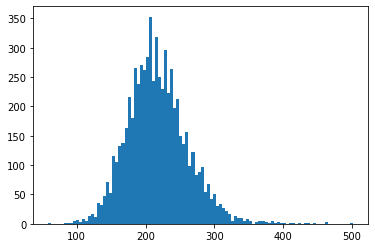

In [106]:
scaled_data = data[['TC']]
plt.hist(scaled_data,bins=100)
plt.show()

In [107]:
import numpy as np

scaled_data = data[['TC']]

print('Mean:', scaled_data['TC'].mean())
print('Standard Deviation:', scaled_data['TC'].std())

Mean: 217.36884660036952
Standard Deviation: 43.79867761570222


### 4.1 Standard Scaling

This type of scaling removes mean and scale data to unit variance. It is defined by the formula:
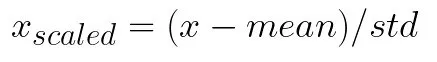
where mean is the mean of the training samples, and std is the standard deviation of the training samples. The best way to understand it is to look at it in practice. For that we use SciKit Learn and StandardScaler class:

In [117]:
from sklearn.preprocessing import StandardScaler
scaled_data = data[['TC']]
standard_scaler = StandardScaler()
transformed = standard_scaler.fit_transform(scaled_data[['TC']])

print('Mean:', scaled_data['TC'].mean())
print('Standard Deviation:', scaled_data['TC'].std())

Mean: 217.36884660036952
Standard Deviation: 43.79867761570222


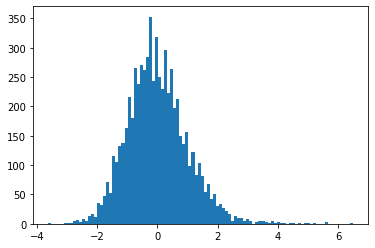

In [118]:
plt.hist(transformed,bins=100)
plt.show()

### 4.2 Min-Max Scaling (Normalization)

The most popular scaling technique is normalization (also called min-max normalization and min-max scaling). It scales all data in the 0 to 1 range. This technique is defined by the formula:

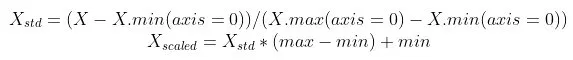

In [98]:
array=np.random.randint(40,120,20)
print(array)

[ 59 108  41 105 103  45  92 110 113 109  64 101  49  53  45 117 112  60
  55 105]


In [99]:
array_new=(array-40)/(120-40)
print(array_new)

[0.2375 0.85   0.0125 0.8125 0.7875 0.0625 0.65   0.875  0.9125 0.8625
 0.3    0.7625 0.1125 0.1625 0.0625 0.9625 0.9    0.25   0.1875 0.8125]


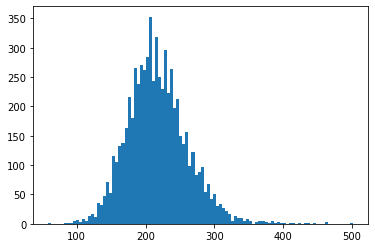

In [120]:
scaled_data = data[['TC']]

plt.hist(scaled_data,bins=100)
plt.show()

In [100]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
transformed = minmax_scaler.fit_transform(scaled_data[['TC']])

print('Mean:', scaled_data['TC'].mean())
print('Standard Deviation:', scaled_data['TC'].std())

Mean: 0.35830055791938825
Standard Deviation: 0.0990920308047569


D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


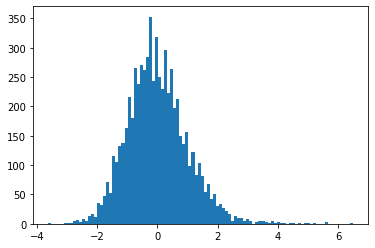

In [121]:
plt.hist(transformed,bins=100)
plt.show()

### 5.3 Quantile Transformation
As we mentioned, sometimes machine learning algorithms require that the distribution of our data is uniform or normal. We can achieve that using QuantileTransformer class from SciKit Learn. First, here is how it looks like when we transform our data to uniform distribution:

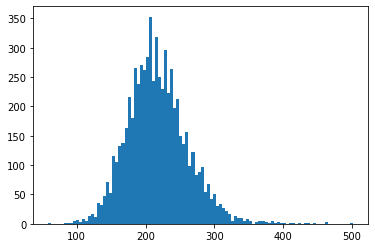

In [122]:
scaled_data = data[['TC']]

plt.hist(scaled_data,bins=100)
plt.show()

In [124]:
from sklearn.preprocessing import QuantileTransformer

qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
transformed = qtrans.fit_transform(scaled_data[['TC']])

print('Mean:', scaled_data['TC'].mean())
print('Standard Deviation:', scaled_data['TC'].std())

Mean: 217.36884660036952
Standard Deviation: 43.79867761570222


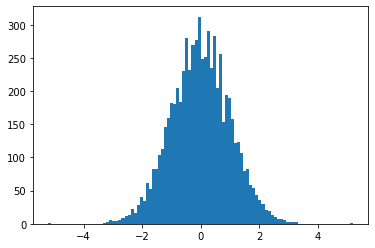

In [125]:
plt.hist(transformed,bins=100)
plt.show()

## 5. Image Feature Extraction

### Neighborhood Operations, Kernals and Filters
In computer vision and image processing a neighborhood operation is a commonly used class of computations on image data which implies that it is processed according to the following pseudo code:

```
Visit each point p in the image data and do {
    N = a neighborhood or region of the image data around the point p
    result(p) = f(N)
}
```
This general procedure can be applied to image data of arbitrary dimensionality. Also, the image data on which the operation is applied does not have to be defined in terms of intensity or color, it can be any type of information which is organized as a function of spatial (and possibly temporal) variables in p.

The result of applying a neighborhood operation on an image is again something which can be interpreted as an image, it has the same dimension as the original data. The value at each image point, however, does not have to be directly related to intensity or color. Instead it is an element in the range of the function f, which can be of arbitrary type.

Normally the neighborhood N is of fixed size and is a square (or a cube, depending on the dimensionality of the image data) centered on the point p. Also the function f is fixed, but may in some cases have parameters which can vary with p, see below.

In the simplest case, the neighborhood N may be only a single point. This type of operation is often referred to as a point-wise operation.

[Visual demo from setosa.io](https://setosa.io/ev/image-kernels/)

### Convolution
See also: Symmetric convolution
Convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel. This is related to a form of mathematical convolution. The matrix operation being performed—convolution—is not traditional matrix multiplication, despite being similarly denoted by *.

For example, if we have two three-by-three matrices, the first a kernel, and the second an image piece, convolution is the process of flipping both the rows and columns of the kernel and multiplying locally similar entries and summing. The element at coordinates [2, 2] (that is, the central element) of the resulting image would be a weighted combination of all the entries of the image matrix, with weights given by the kernel:

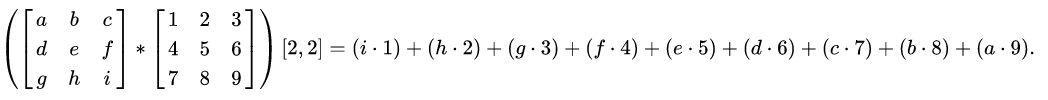

The other entries would be similarly weighted, where we position the center of the kernel on each of the boundary points of the image, and compute a weighted sum.

The values of a given pixel in the output image are calculated by multiplying each kernel value by the corresponding input image pixel values. This can be described algorithmically with the following pseudo-code:

### Few Famous and usefull Kernels
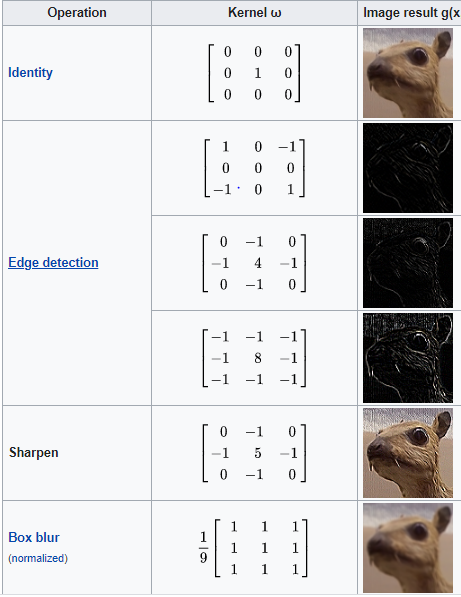

### Sobel Kernels
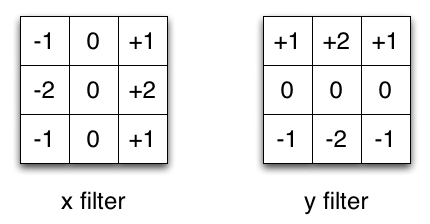

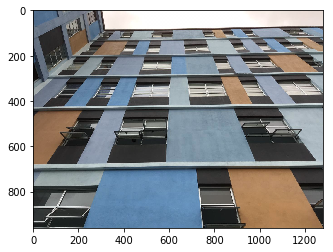

In [2]:
import cv2

img=cv2.imread('Samples/sample.jpg')

from matplotlib import pyplot as plt

plt.imshow(img)

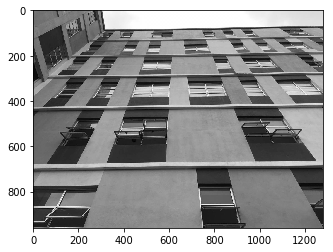

In [3]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#gray-result image, img-source image
#cv2.COLOR_BGR2GRAY-color conversion method
#cvtColor function is used to convert color
plt.imshow(gray,cmap='gray')

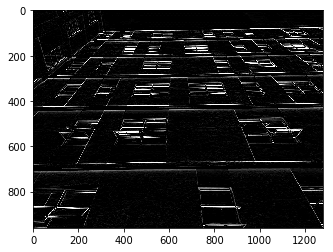

In [4]:
import numpy as np

kernel=np.array([[-1,-2,-1],
                 [0,0,0],
                 [1,2,1]],np.float)

conv=cv2.filter2D(gray,-1,kernel)
plt.imshow(conv,cmap='gray')

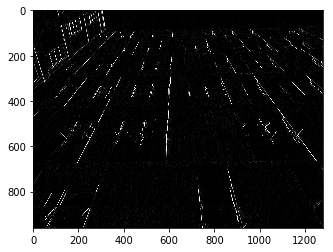

In [5]:
kernel=np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]],np.float)

conv=cv2.filter2D(gray,-1,kernel)
plt.imshow(conv,cmap='gray')

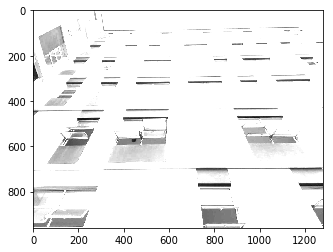

In [6]:
kernel=np.array([[0.25,0,0.75],
                 [0,0,0.4],
                 [0.8,0,2.5]],np.float)

conv=cv2.filter2D(gray,-1,kernel)
plt.imshow(conv,cmap='gray')

### Example - Lane Detection using Edge Detection

In [12]:
import cv2

source=cv2.VideoCapture('Samples/road_drive.avi')
kernel=np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]],np.float)
while(True):
    
    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    conv=cv2.filter2D(gray,-1,kernel)
    ret, thresh = cv2.threshold(conv, 100, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        area=cv2.contourArea(cnt)
        #print(area)
        if(area>50):
            cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
            #x,y,w,h = cv2.boundingRect(cnt)
            #img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)            
            rect = cv2.minAreaRect(cnt)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            cv2.drawContours(img,[box],0,(0,0,255),2)
            
    cv2.imshow('LIVE',img)
    cv2.imshow('conv',conv)
    cv2.imshow('thresh',thresh)
    key=cv2.waitKey(100)

    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()